In [19]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

# Import and read the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [20]:
# Drop non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

# Determine the number of unique values in each column to decide on binning
print(application_df.nunique())

# Bin the application types with less frequent occurrences
application_types_to_replace = application_df['APPLICATION_TYPE'].value_counts()[application_df['APPLICATION_TYPE'].value_counts() < 500].index.tolist()
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app, 'Other')

# Bin the classification with less frequent occurrences
classifications_to_replace = application_df['CLASSIFICATION'].value_counts()[application_df['CLASSIFICATION'].value_counts() < 100].index.tolist()
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls, 'Other')

# Generate our categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df, columns=application_cat)

# Display the first few rows of the DataFrame to check the preprocessing
application_df.head()


APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [21]:
# Import TensorFlow
import tensorflow as tf

# Define the model - adjust the input dimension in the first layer
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=100, activation='relu', input_dim=49))  # Adjusted to match the feature count
nn.add(tf.keras.layers.Dense(units=50, activation='relu'))
nn.add(tf.keras.layers.Dense(units=25, activation='relu'))
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# First hidden layer with more neurons
nn.add(tf.keras.layers.Dense(units=100, activation='relu', input_dim=len(application_df.columns)))

# Adding an additional hidden layer
nn.add(tf.keras.layers.Dense(units=50, activation='relu'))

# Adding a third hidden layer
nn.add(tf.keras.layers.Dense(units=25, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()


/opt/homebrew/anaconda3/envs/bootcamp/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 100)            │         5,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            26 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,902 (69.93 KB)

 Trainable params: 17,902 (69.93 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [23]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features and target
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'], axis=1).values

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a StandardScaler instance and fit it to the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
# Import necessary package for callbacks
from tensorflow.keras.callbacks import EarlyStopping

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = nn.fit(X_train_scaled, y_train, epochs=100, batch_size=20, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100


2024-04-25 00:19:33.082391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 38s 32ms/step - accuracy: 0.6701 - loss: 0.6133 - val_accuracy: 0.7136 - val_loss: 0.5720
Epoch 2/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.7272 - loss: 0.5619 - val_accuracy: 0.7365 - val_loss: 0.5547
Epoch 3/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.7271 - loss: 0.5543 - val_accuracy: 0.7392 - val_loss: 0.5494
Epoch 4/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.7255 - loss: 0.5598 - val_accuracy: 0.7380 - val_loss: 0.5468
Epoch 5/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.7306 - loss: 0.5534 - val_accuracy: 0.7354 - val_loss: 0.5496
Epoch 6/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.7312 - loss: 0.5517 - val_accuracy: 0.7394 - val_loss: 0.5460
Epoch 7/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.7358 - loss: 0.5482 - val_accuracy: 0.7385 - val_loss: 0.5488
Epoch 8/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.7309 - los

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


215/215 - 2s - 7ms/step - accuracy: 0.7268 - loss: 0.5548
Loss: 0.5548356175422668, Accuracy: 0.7268221378326416


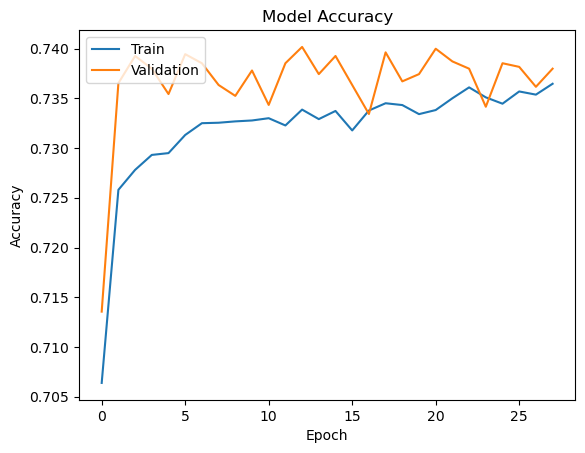

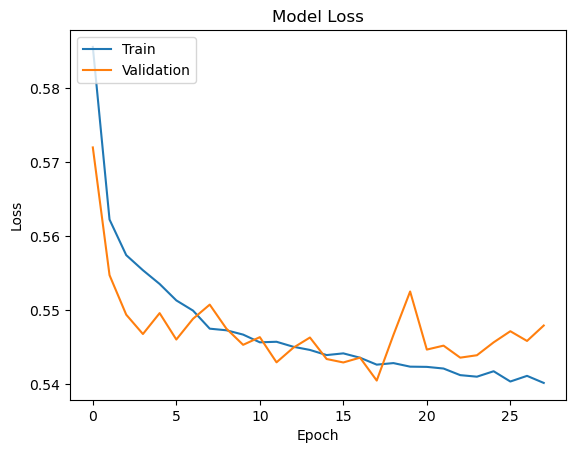

In [26]:
# Plot the training history
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [27]:
# Save the optimized model
nn.save("optimized_alphabet_soup_model.h5")
